# Project: Fake News Detection System

# Submitted by: Praveen Kumar(19HCS4039),Mayank Sharma(19HCS4034)

In [1]:
# importing dependencies
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re
import string
import matplotlib as plt

## Data Preprocessing

In [2]:
# importing datasets

df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [3]:
#printing fake news
df_fake.head(15)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [4]:
# printing true news

df_true.head(15)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [5]:
# assigning class

df_fake["class"]=0
df_true["class"]=1

In [6]:
# checking number of rows and columns in datasets

df_fake.shape , df_true.shape

((23481, 5), (21417, 5))

In [7]:
# taking 10 records each datasets, later used for manual_testing

df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [10]:
# concatinating records taking from fake and true datasets 

df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing],axis=0)
df_manual_testing.to_csv("manual_testing.csv")

In [11]:
# merging both datasets to fet one dataset

df_merge = pd.concat([df_true , df_fake],axis=0)
df_merge.head(16)

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",1
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",1
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",1


In [12]:
# Dimensionality reduction : dropping insignificant attributes

df = df_merge.drop(["title","subject","date"],axis=1)

In [13]:
df.head(16)

,text,class
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
5,"WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",1
6,"WEST PALM BEACH, Fla (Reuters) - President Don...",1
7,The following statements were posted to the ve...,1
8,The following statements were posted to the ve...,1
9,WASHINGTON (Reuters) - Alabama Secretary of St...,1


In [14]:
# shuffling of dataset

df = df.sample(frac=1)
df.head(16)

,text,class
9791,The backlash from angry fans has only gotten b...,0
5551,Following the horrific turn of events in Dalla...,0
6923,WASHINGTON (Reuters) - President-elect Donald ...,1
15929,ROME (Reuters) - Prime Minister Paolo Gentilon...,1
1096,WASHINGTON (Reuters) - U.S. Senate Republican ...,1
13405,"Meanwhile, police officers were outside the wa...",0
17699,Is this just one more case of an activist judg...,0
8114,"FAIRFAX, Va. (Reuters) - Democratic presidenti...",1
10027,(Reuters) - South Carolina lawmakers have intr...,1
20383,Would Hillary s every day Americans answer t...,0


In [15]:
# counting number of missing values in dataset

df.isnull().sum()

text     0
class    0
dtype: int64

In [16]:
def word_drop(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [17]:
df["text"] = df["text"].apply(word_drop)
df.head(16)

,text,class
9791,the backlash from angry fans has only gotten b...,0
5551,following the horrific turn of events in dalla...,0
6923,washington reuters president elect donald ...,1
15929,rome reuters prime minister paolo gentilon...,1
1096,washington reuters u s senate republican ...,1
13405,meanwhile police officers were outside the wa...,0
17699,is this just one more case of an activist judg...,0
8114,fairfax va reuters democratic presidenti...,1
10027,reuters south carolina lawmakers have intr...,1
20383,would hillary s every day americans answer t...,0


In [18]:
# assigning attributes to variables

x = df["text"]
y = df["class"]

In [19]:
#splitting dataset  

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.30)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
# performing vectorization
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)
print(xv_train)

  (0, 38152)	0.014693102998621822
  (0, 31622)	0.01509706984525955
  (0, 80528)	0.03543236787417642
  (0, 49634)	0.030907706933935214
  (0, 87746)	0.010361870521486264
  (0, 38145)	0.011381945539156803
  (0, 27971)	0.01192361837562469
  (0, 53729)	0.023568095713663913
  (0, 8171)	0.014961838374715914
  (0, 58355)	0.028019680502839848
  (0, 82493)	0.009603273975767832
  (0, 26450)	0.013480205188539008
  (0, 64652)	0.020789735244076048
  (0, 16870)	0.019058614874703568
  (0, 36268)	0.015562738923641708
  (0, 39006)	0.0335377349004199
  (0, 53578)	0.010550607658430765
  (0, 76475)	0.014043281198756195
  (0, 11266)	0.014420784848706188
  (0, 58367)	0.02726381464916115
  (0, 82047)	0.011924387857135172
  (0, 72954)	0.017109499791621734
  (0, 2781)	0.012016141124779093
  (0, 56767)	0.01485745458122943
  (0, 82197)	0.019392165279543933
  :	:
  (31413, 77823)	0.1631565726877762
  (31413, 87529)	0.17351437857308652
  (31413, 89857)	0.14620508570120494
  (31413, 37006)	0.1365872231340712
  (3141

In [22]:
print(xv_train[1])
xv_train.shape

(31414, 92645)

## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [25]:
#Checking Accuracy
pred=LR.predict(xv_test)
print(pred)
LR.score(xv_test,y_test)

#cm=metrics.confusion_matrix(y_test)

[1 0 1 ... 1 1 0]


0.9870023767082591

#### classification report

In [26]:
pred_LR = LR.predict(xv_test)
print(classification_report(y_test,pred_LR))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7021
           1       0.98      0.99      0.99      6443

    accuracy                           0.99     13464
   macro avg       0.99      0.99      0.99     13464
weighted avg       0.99      0.99      0.99     13464



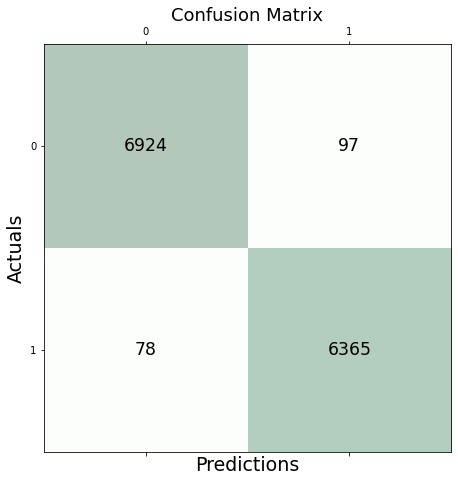

In [27]:
# printing confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=y_test ,y_pred = pred_LR)
fig,ax = plt.subplots(figsize=(7.5,7.5))
ax.matshow(conf_matrix,cmap=plt.cm.Greens,alpha=0.3)
for i in range(conf_matrix.shape[1]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j,y=i,s=conf_matrix[i,j],va='center',ha='center',size='xx-large')
plt.xlabel('Predictions',fontsize = 19)
plt.ylabel('Actuals',fontsize = 19)
plt.title('Confusion Matrix',fontsize=18)
plt.show()

## Decision Tree Classification

In [28]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [29]:
#Checking Accuracy
pred_DT=LR.predict(xv_test)
print(pred_DT)
DT.score(xv_test,y_test)

[1 0 1 ... 1 1 0]


0.9959893048128342

#### classification report

In [30]:
pred_DT = DT.predict(xv_test)
print(classification_report(y_test,pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7021
           1       1.00      0.99      1.00      6443

    accuracy                           1.00     13464
   macro avg       1.00      1.00      1.00     13464
weighted avg       1.00      1.00      1.00     13464



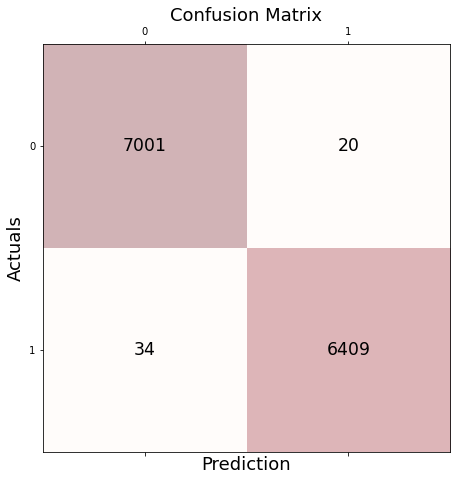

In [31]:
# confusion matrix
import matplotlib.pyplot as plt
conf_matrix=confusion_matrix(y_true=y_test, y_pred=pred_DT)
fig, ax =plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Reds, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j],va='center', ha='center', size='xx-large')
        
plt.xlabel('Prediction', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [32]:
from sklearn import tree
#tree.plot_tree(DT);
#import graphviz
#dot_data = tree.export_graphviz(DT,out_file=None,feature_names = xv_train,class_names = y_train,filled=True)
#graph = graphviz.Source(dot_data , format="png")
#graph.render("decision_tree_graphivz")
#'decision_tree_graphivz.png'
tree.export_graphviz(DT,out_file='tree.dot')

In [36]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [38]:
pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=b4cd5ac0fb05c26f868e197095fb5191fb9a9c7ceda56c242e22ed628ef26e5c
  Stored in directory: c:\users\prave\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


|--- feature_68925 <= 0.01
|   |--- feature_9361 <= 0.01
|   |   |--- feature_45465 <= 0.05
|   |   |   |--- feature_12633 <= 0.11
|   |   |   |   |--- feature_37915 <= 0.12
|   |   |   |   |   |--- feature_31390 <= 0.05
|   |   |   |   |   |   |--- feature_59403 <= 0.04
|   |   |   |   |   |   |   |--- feature_6925 <= 0.02
|   |   |   |   |   |   |   |   |--- feature_12673 <= 0.03
|   |   |   |   |   |   |   |   |   |--- feature_67289 <= 0.03
|   |   |   |   |   |   |   |   |   |   |--- feature_25521 <= 0.01
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 47
|   |   |   |   |   |   |   |   |   |   |--- feature_25521 >  0.01
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_67289 >  0.03
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_12673 >  0.03
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_6925 >  0.02
| 

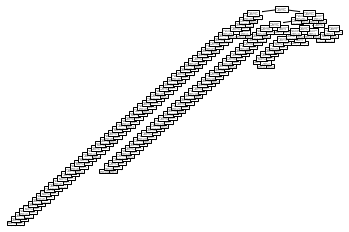

In [48]:
text_representation = tree.export_text(DT)
print(text_representation)

## Manual Testing

In [36]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Real News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(word_drop) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    print("\n\n\n\n")
    print(new_xv_test)
    return print("\n\nLR Prediction: {} \nDT Prediction: {} ".format(output_lable(pred_LR[0]),output_lable(pred_DT[0])))

In [37]:
news = str(input())
manual_testing(news)

Patrick Henningsen  21st Century WireRemember when the Obama Administration told the world how it hoped to identify 5,000 reliable non-jihadist  moderate  rebels hanging out in Turkey and Jordan, who might want to fight for Washington in Syria? After all the drama over its infamous  train and equip  program to create their own Arab army in Syria, they want to give it another try.This week, Pentagon officials announced their new plan to train up to 7,000 more  moderate  fighters, but this time the project would take place inside Syria (and to hell with international law).We re told that this was requested by Ankara, and with all NATO allies singing the same hymn   claiming that this new effort will help in securing Turkey s porous border with Syria, or so the story goes. Washington s political cover for this is fashioned from the popular post-Paris theme: to protect civilized Europe from invading hordes and the terrorists who hide among them, as stated in the Wall Street Journal: The pr






  (0, 48)	0.01033519153594601
  (0, 336)	0.018198671289585956
  (0, 341)	0.021292649960419616
  (0, 375)	0.007837916809790148
  (0, 407)	0.012066574983907747
  (0, 570)	0.007956659473324775
  (0, 571)	0.021884391010997553
  (0, 621)	0.005590564706139591
  (0, 647)	0.00824428565365355
  (0, 677)	0.007862889639391768
  (0, 738)	0.005307241827591212
  (0, 740)	0.005244156991397111
  (0, 744)	0.00871083718889925
  (0, 784)	0.008966358195695167
  (0, 877)	0.0068579988999597765
  (0, 883)	0.006275370302078112
  (0, 1006)	0.008670814812722414
  (0, 1040)	0.00927885714613714
  (0, 1263)	0.013549868049856355
  (0, 1313)	0.011326569131344848
  (0, 1323)	0.007826944530583673
  (0, 1388)	0.016410503609833926
  (0, 1413)	0.009817468036427445
  (0, 1416)	0.006911151301603635
  (0, 1444)	0.012897599251127203
  :	:
  (0, 90604)	0.016670333029225486
  (0, 90699)	0.07240860321821202
  (0, 90701)	0.008487092813531346
  (0, 90719)	0.016864816338509905
  (0, 90890)	0.015892357963538956
  (0, 90901)	0.